In [2]:
import pandas as pd # type: ignore
import numpy as np

In [3]:
path = 'heart_2022.csv'
data = pd.read_csv(path)

In [4]:
def find(df):
    num_col = df.select_dtypes(include="number").columns
    cat_col = df.select_dtypes(include="object").columns
    return num_col,cat_col
num_col,cat_col = find(data)
data.loc[:,num_col] = data[num_col].apply(lambda x:x.fillna(x.median()))
data.loc[:,cat_col] = data[cat_col].apply(lambda x:x.fillna(x.mode()[0]))

SAMPLE DATA

In [5]:
df=data.copy()

# Separate rows into "Yes" and "No" categories
df_yes = df[df['HadHeartAttack'] == 'Yes']
df_no = df[df['HadHeartAttack'] == 'No']

# Determine the number of samples per category (assuming equal numbers)
num_samples = min(len(df_yes), len(df_no))

# Sample equal numbers from each category
sampled_yes = df_yes.sample(n=num_samples, random_state=42)
sampled_no = df_no.sample(n=num_samples, random_state=42)

# Concatenate sampled subsets into a single DataFrame
sample_data = pd.concat([sampled_yes, sampled_no])

print("Sampled DataFrame with equal 'Yes' and 'No' values in BinaryColumn:")
print(sample_data)

Sampled DataFrame with equal 'Yes' and 'No' values in BinaryColumn:
                 State     Sex GeneralHealth  PhysicalHealthDays  \
311200          Oregon    Male     Very good                11.0   
165857        Maryland    Male          Good                30.0   
431151       Wisconsin  Female          Fair                10.0   
122698            Iowa  Female          Fair                30.0   
356876           Texas    Male          Fair                 0.0   
...                ...     ...           ...                 ...   
293577            Ohio  Female          Good                 0.0   
316539    Pennsylvania    Male     Excellent                 1.0   
381037        Virginia  Female          Good                 0.0   
9102            Alaska    Male     Very good                 3.0   
332733  South Carolina  Female     Very good                 2.0   

        MentalHealthDays                                    LastCheckupTime  \
311200               0.0  Within pas

In [6]:
sample_data.shape

(50216, 40)

In [7]:
sample_data.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [8]:
sample_data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

EDA

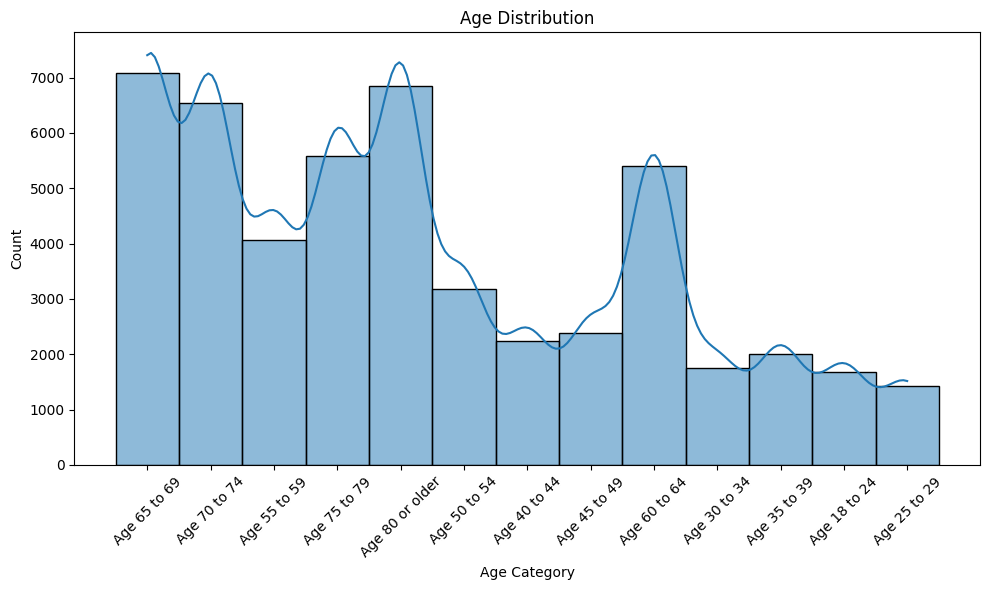

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing your dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=sample_data, x='AgeCategory', bins=15, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


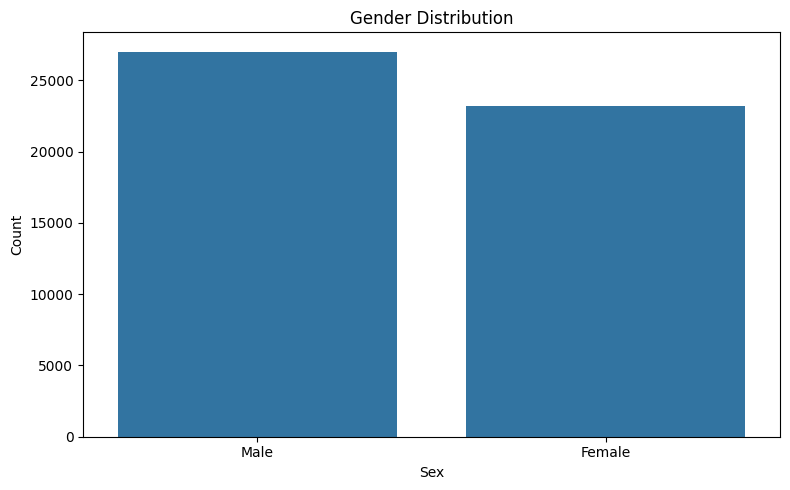

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=sample_data, x='Sex')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


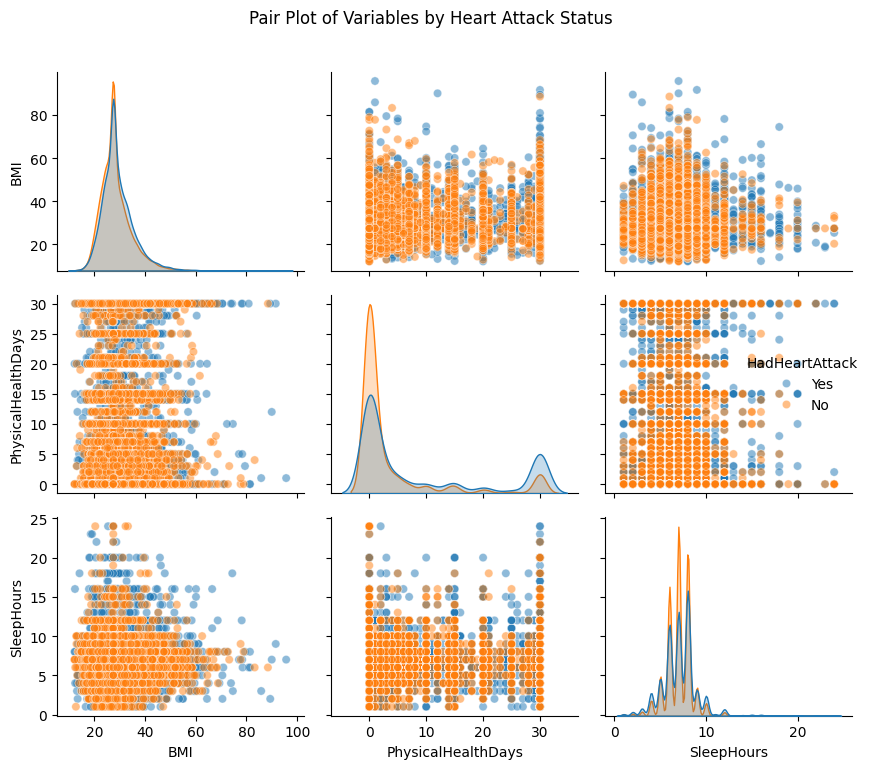

In [11]:
# Selecting relevant columns for pair plot
cols = ['HadHeartAttack', 'BMI', 'PhysicalHealthDays', 'SleepHours', 'PhysicalActivities']

# Creating a pair plot
sns.pairplot(sample_data[cols], hue='HadHeartAttack', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Variables by Heart Attack Status', y=1.02)
plt.tight_layout()
plt.show()


In [12]:

num_col,cat_col = find(sample_data)

In [13]:
print(num_col,cat_col)

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object') Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [14]:
selected_columns = [
    'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
    'HeightInMeters', 'WeightInKilograms', 'BMI',
    'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'CovidPos',
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'
]


In [48]:
print(len(selected_columns))

21


In [15]:
df = sample_data[selected_columns]
num_col,cat_col=find(df)

In [16]:
print(num_col,cat_col)

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object') Index(['ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'CovidPos', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes'],
      dtype='object')


Replace null values wrt median and mode

In [17]:
df.loc[:,num_col] = df[num_col].apply(lambda x:x.fillna(x.median()))

In [18]:
df[num_col].isnull().sum()

PhysicalHealthDays    0
MentalHealthDays      0
SleepHours            0
HeightInMeters        0
WeightInKilograms     0
BMI                   0
dtype: int64

In [19]:
df.loc[:,cat_col] = df[cat_col].apply(lambda x:x.fillna(x.mode()[0]))

In [20]:
df[cat_col].isnull().sum()

ECigaretteUsage          0
RaceEthnicityCategory    0
AgeCategory              0
AlcoholDrinkers          0
CovidPos                 0
HadHeartAttack           0
HadAngina                0
HadStroke                0
HadAsthma                0
HadSkinCancer            0
HadCOPD                  0
HadDepressiveDisorder    0
HadKidneyDisease         0
HadArthritis             0
HadDiabetes              0
dtype: int64

Modifying agecategory col

In [21]:
df['AgeCategory'].unique()

array(['Age 65 to 69', 'Age 70 to 74', 'Age 55 to 59', 'Age 75 to 79',
       'Age 80 or older', 'Age 50 to 54', 'Age 40 to 44', 'Age 45 to 49',
       'Age 60 to 64', 'Age 30 to 34', 'Age 35 to 39', 'Age 18 to 24',
       'Age 25 to 29'], dtype=object)

In [22]:
# Mapping of existing age ranges to new broader categories
age_mapping = {
    'Age 18 to 24': '18-34',
    'Age 25 to 29': '18-34',
    'Age 30 to 34': '18-34',
    'Age 35 to 39': '35-54',
    'Age 40 to 44': '35-54',
    'Age 45 to 49': '35-54',
    'Age 50 to 54': '35-54',
    'Age 55 to 59': '55-79',
    'Age 60 to 64': '55-79',
    'Age 65 to 69': '55-79',
    'Age 70 to 74': '55-79',
    'Age 75 to 79': '55-79',
    'Age 80 or older': '80+'
}

# Apply the mapping to AgeCategory column
df.loc[:,'AgeCategory'] = df['AgeCategory'].apply(lambda x: age_mapping[x])

# Verify the result
df['AgeCategory'].value_counts()


AgeCategory
55-79    28683
35-54     9808
80+       6853
18-34     4872
Name: count, dtype: int64

In [23]:
for c in cat_col:
    print(c,'---->',df[c].unique())

ECigaretteUsage ----> ['Never used e-cigarettes in my entire life' 'Not at all (right now)'
 'Use them some days' 'Use them every day']
RaceEthnicityCategory ----> ['White only, Non-Hispanic' 'Other race only, Non-Hispanic' 'Hispanic'
 'Black only, Non-Hispanic' 'Multiracial, Non-Hispanic']
AgeCategory ----> ['55-79' '80+' '35-54' '18-34']
AlcoholDrinkers ----> ['Yes' 'No']
CovidPos ----> ['Yes' 'No'
 'Tested positive using home test without a health professional']
HadHeartAttack ----> ['Yes' 'No']
HadAngina ----> ['No' 'Yes']
HadStroke ----> ['No' 'Yes']
HadAsthma ----> ['No' 'Yes']
HadSkinCancer ----> ['No' 'Yes']
HadCOPD ----> ['No' 'Yes']
HadDepressiveDisorder ----> ['No' 'Yes']
HadKidneyDisease ----> ['No' 'Yes']
HadArthritis ----> ['Yes' 'No']
HadDiabetes ----> ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but only during pregnancy (female)']


Removing outliers in NUM_COL

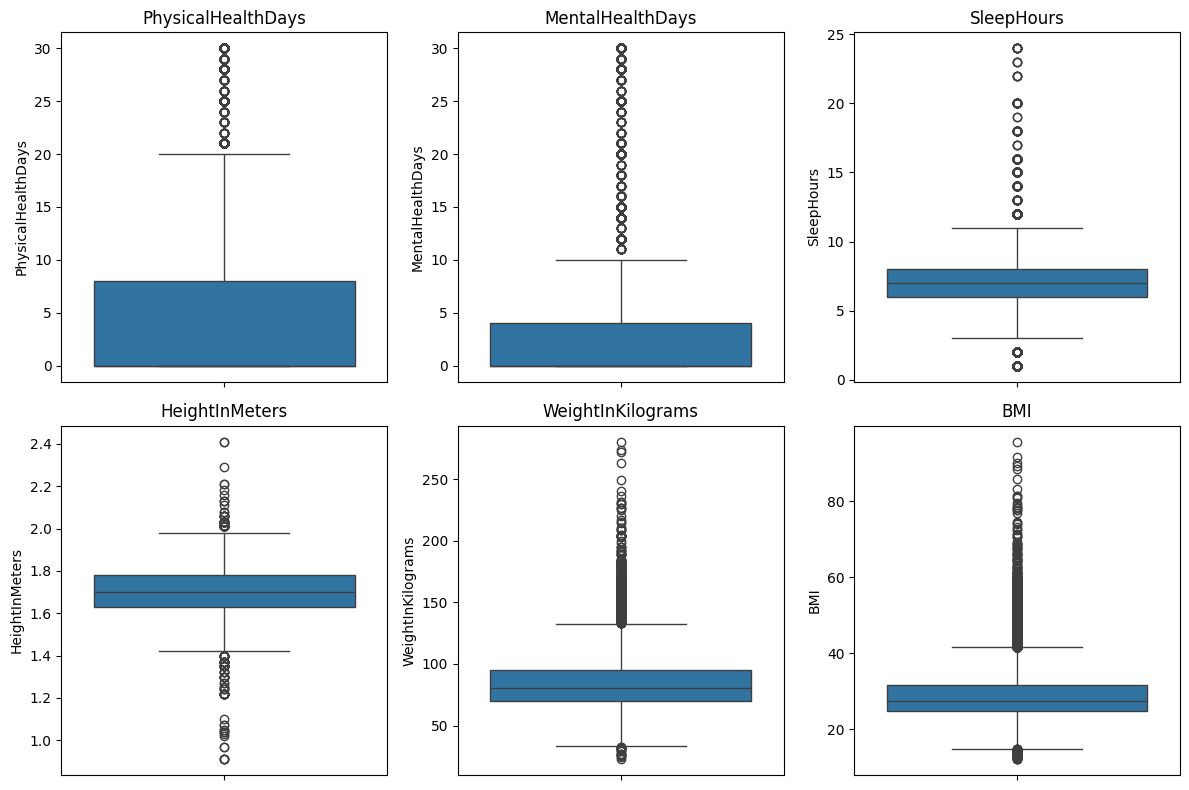

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the cleaned numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()


In [25]:
from scipy import stats


z_scores = stats.zscore(df[num_col])
# Identify outliers (threshold of Z-score > 3 or < -3 is commonly used)
outliers = (z_scores > 3) | (z_scores < -3)
# Print outliers
print("Outliers:")
print(df[num_col][outliers.any(axis=1)])

Outliers:
        PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
413151                30.0              30.0         2.0            1.70   
236588                15.0              10.0         7.0            1.63   
391469                30.0              30.0         6.0            1.65   
416084                20.0              30.0         7.0            1.68   
135103                30.0               0.0         7.0            1.60   
...                    ...               ...         ...             ...   
352338                 0.0               0.0        14.0            1.78   
23329                  0.0               0.0         8.0            1.85   
70046                  0.0              10.0         6.0            1.73   
59498                 30.0              30.0        12.0            1.91   
429444                 0.0              29.0         6.0            1.55   

        WeightInKilograms    BMI  
413151             158.76  54.82  
236588 

In [26]:
# Remove outliers
df_clean = df[~outliers.any(axis=1)]

# Print cleaned DataFrame
print("Cleaned DataFrame:")
print(df_clean[num_col])


Cleaned DataFrame:
        PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
311200                11.0               0.0         7.0            1.91   
165857                30.0               0.0         7.0            1.68   
431151                10.0               5.0         4.0            1.57   
122698                30.0              15.0         6.0            1.68   
356876                 0.0               0.0         7.0            1.85   
...                    ...               ...         ...             ...   
293577                 0.0               0.0         8.0            1.70   
316539                 1.0               0.0         8.0            1.70   
381037                 0.0               0.0         7.0            1.55   
9102                   3.0               1.0         6.0            1.70   
332733                 2.0              30.0         8.0            1.68   

        WeightInKilograms    BMI  
311200             117.93  32.50 

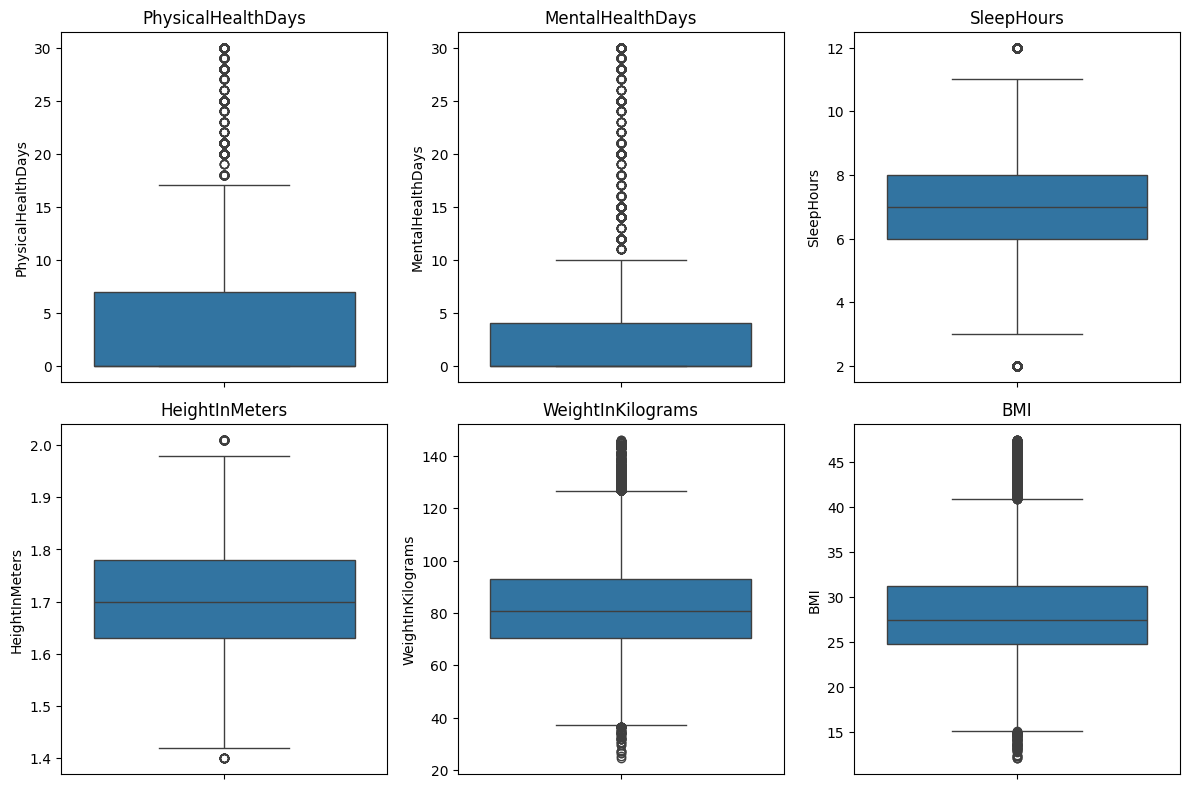

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the cleaned numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_clean, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()


In [28]:
bin_cat_col = [c for c in cat_col if len(df[c].unique())==2]
non_bin_cat_col = [c for c in cat_col if c not in bin_cat_col]
print(bin_cat_col)
print(non_bin_cat_col)

['AlcoholDrinkers', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis']
['ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'CovidPos', 'HadDiabetes']


In [29]:
df_clean['HadHeartAttack'].value_counts()

HadHeartAttack
No     24559
Yes    24241
Name: count, dtype: int64

Splitting the data

In [30]:
from sklearn.model_selection import train_test_split
X = df_clean.drop(columns=['HadHeartAttack'])
y = df_clean['HadHeartAttack']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

ML

In [31]:
num_col,cat_col=find(X)
bin_cat_col = [c for c in cat_col if len(df[c].unique())==2]
non_bin_cat_col = [c for c in cat_col if c not in bin_cat_col]

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),  # Scale numerical columns
        ('ord_cat', OrdinalEncoder(), non_bin_cat_col),  # Ordinal encode ordinal categorical columns
        ('non_ord_cat', OneHotEncoder(handle_unknown='ignore'), bin_cat_col)  # One-hot encode non-ordinal categorical columns
    ],
    remainder='passthrough'
)

In [33]:
# Define the model (example with RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


model = RandomForestClassifier(random_state=42)
# Create a pipeline combining preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [34]:
# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

In [35]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7685450819672132

Classification Report:
               precision    recall  f1-score   support

          No       0.76      0.80      0.78      5011
         Yes       0.77      0.74      0.76      4749

    accuracy                           0.77      9760
   macro avg       0.77      0.77      0.77      9760
weighted avg       0.77      0.77      0.77      9760



In [36]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
print(cf)

[[3984 1027]
 [1232 3517]]


In [37]:
y.head()

311200    Yes
165857    Yes
431151    Yes
122698    Yes
356876    Yes
Name: HadHeartAttack, dtype: object

In [38]:

# Predict probabilities on test data
from sklearn.calibration import LabelEncoder
from sklearn.metrics import auc, roc_curve


y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class

label_encoder = LabelEncoder()
y_true_binary = label_encoder.fit_transform(y_test)


# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

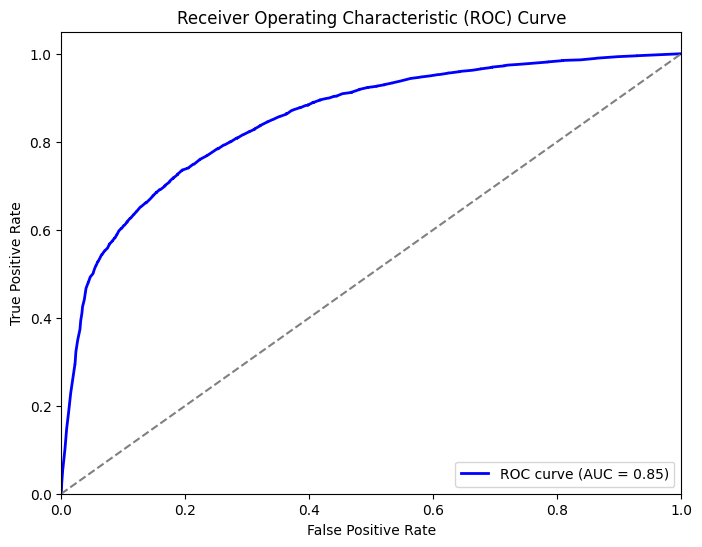

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Dataset was imbalanced now its time to make it balanced using oversampling

In [40]:
loda = data[selected_columns]
loda = loda.sample(n=172400,random_state=42)
num_col,cat_col=find(loda)
loda.loc[:,num_col] = loda[num_col].apply(lambda x:x.fillna(x.median()))
loda.loc[:,cat_col] = loda[cat_col].apply(lambda x:x.fillna(x.mode()[0]))
loda.loc[:,'AgeCategory'] = loda['AgeCategory'].apply(lambda x: age_mapping[x])
X=loda.drop(columns=['HadHeartAttack'])
y=loda['HadHeartAttack']

In [41]:
from imblearn.over_sampling import RandomOverSampler
# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X,y)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [ ]:
num_col,cat_col=find(X)
bin_cat_col = [c for c in cat_col if len(df[c].unique())==2]
non_bin_cat_col = [c for c in cat_col if c not in bin_cat_col]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),  # Scale numerical columns
        ('ord_cat', OrdinalEncoder(), non_bin_cat_col),  # Ordinal encode ordinal categorical columns
        ('non_ord_cat', OneHotEncoder(handle_unknown='ignore'), bin_cat_col)  # One-hot encode non-ordinal categorical columns
    ],
    remainder='passthrough'
)

In [ ]:
# Define the model (example with RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


model = RandomForestClassifier(random_state=42)
# Create a pipeline combining preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9821642731941327

Classification Report:
               precision    recall  f1-score   support

          No       1.00      0.97      0.98     32525
         Yes       0.97      1.00      0.98     32513

    accuracy                           0.98     65038
   macro avg       0.98      0.98      0.98     65038
weighted avg       0.98      0.98      0.98     65038



In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
print(cf)

[[31435  1090]
 [   70 32443]]


Lets draw ROC and AUC curve and check it.

To draw the curve we need to have probablities of X_test

lets calculate False Positive and True Positive rate

In [ ]:

# Predict probabilities on test data
from sklearn.calibration import LabelEncoder
from sklearn.metrics import auc, roc_curve


y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class

label_encoder = LabelEncoder()
y_true_binary = label_encoder.fit_transform(y_test)


# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

In [ ]:
roc_auc

0.9990993071227725

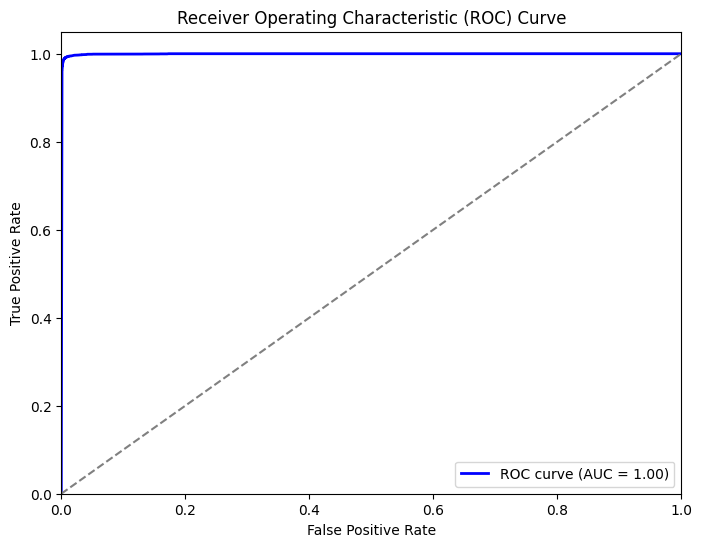

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

LOOKS LIKE IT INDICATES OUR MODEL DID VERY WELL

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,train_size=0.8,random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,FunctionTransformer
numerical_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours','HeightInMeters', 'WeightInKilograms', 'BMI']
categorical_columns = ['ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory','AlcoholDrinkers', 'CovidPos', 'HadAngina','HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD','HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis','HadDiabetes']

age_mapping = {
    'Age 18 to 24': '18-34',
    'Age 25 to 29': '18-34',
    'Age 30 to 34': '18-34',
    'Age 35 to 39': '35-54',
    'Age 40 to 44': '35-54',
    'Age 45 to 49': '35-54',
    'Age 50 to 54': '35-54',
    'Age 55 to 59': '55-79',
    'Age 60 to 64': '55-79',
    'Age 65 to 69': '55-79',
    'Age 70 to 74': '55-79',
    'Age 75 to 79': '55-79',
    'Age 80 or older': '80+'
}
def map_age_category(X):
    # Assuming X is a DataFrame or a 2D array
    if isinstance(X, pd.DataFrame):
        X = X.replace(age_mapping)
    else:
        df = pd.DataFrame(X, columns=categorical_columns)
        df = df.replace(age_mapping)
        X = df.values
    return X
age_category_transformer = FunctionTransformer(map_age_category)

num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("age_mapper", age_category_transformer),
        ("Ordinal_encoding", OrdinalEncoder()),
        ("scaler", StandardScaler(with_mean=False))
    ]
)

preprocesor = ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,numerical_columns),
        ("cat_pipeline",cat_pipeline,categorical_columns)
    ]
)

In [ ]:
f=sample_data[selected_columns]
X=f.drop(columns=["HadHeartAttack"])
y=f['HadHeartAttack']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



        PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
305859                10.0               0.0         6.0            1.85   
159596                30.0              10.0        10.0            1.80   
134694                10.0               0.0         6.0            1.73   
194245                 0.0               3.0         8.0            1.57   
43501                 30.0               2.0         6.0            1.70   

        WeightInKilograms    BMI                            ECigaretteUsage  \
305859             111.13  32.32                     Not at all (right now)   
159596             163.29  50.21  Never used e-cigarettes in my entire life   
134694              98.88  33.15  Never used e-cigarettes in my entire life   
194245              58.97  23.78  Never used e-cigarettes in my entire life   
43501               50.80  17.54  Never used e-cigarettes in my entire life   

           RaceEthnicityCategory      AgeCategory AlcoholDrinkers Co

In [ ]:
pd.DataFrame(X_train).head().shape

(5, 20)

In [ ]:
pd.DataFrame(y_train).head().shape

(5, 1)

In [ ]:
X_train = preprocesor.fit_transform(X_train)
X_test = preprocesor.transform(X_test)


In [ ]:
X_train[:1]

array([[ 0.33496532, -0.52055413, -0.60450722,  1.3745181 ,  1.31050711,
         0.57258539,  1.62607925,  3.11986349,  1.23233952,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.77571427,  2.38651186,  0.        ,  0.        ,  2.2954267 ]])

In [42]:
bin_cat_col

['AlcoholDrinkers',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis']

In [43]:
for c in bin_cat_col:
    print(sample_data[c].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']


In [45]:
for c in non_bin_cat_col:
    print(c,':  ',sample_data[c].unique())

ECigaretteUsage :   ['Never used e-cigarettes in my entire life' 'Not at all (right now)'
 'Use them some days' 'Use them every day']
RaceEthnicityCategory :   ['White only, Non-Hispanic' 'Other race only, Non-Hispanic' 'Hispanic'
 'Black only, Non-Hispanic' 'Multiracial, Non-Hispanic']
AgeCategory :   ['Age 65 to 69' 'Age 70 to 74' 'Age 55 to 59' 'Age 75 to 79'
 'Age 80 or older' 'Age 50 to 54' 'Age 40 to 44' 'Age 45 to 49'
 'Age 60 to 64' 'Age 30 to 34' 'Age 35 to 39' 'Age 18 to 24'
 'Age 25 to 29']
CovidPos :   ['Yes' 'No'
 'Tested positive using home test without a health professional']
HadDiabetes :   ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but only during pregnancy (female)']


In [50]:
for c in num_col:
    print(c,min(sample_data[c]),max(sample_data[c]))

PhysicalHealthDays 0.0 30.0
MentalHealthDays 0.0 30.0
SleepHours 1.0 24.0
HeightInMeters 0.91 2.41
WeightInKilograms 22.68 280.32
BMI 12.11 95.66


In [66]:
for c in selected_columns:
    print(sample_data[c][sample_data[c]=='Yes'][:1])

Series([], Name: PhysicalHealthDays, dtype: float64)
Series([], Name: MentalHealthDays, dtype: float64)
Series([], Name: SleepHours, dtype: float64)
Series([], Name: HeightInMeters, dtype: float64)
Series([], Name: WeightInKilograms, dtype: float64)
Series([], Name: BMI, dtype: float64)
Series([], Name: ECigaretteUsage, dtype: object)
Series([], Name: RaceEthnicityCategory, dtype: object)
Series([], Name: AgeCategory, dtype: object)
311200    Yes
Name: AlcoholDrinkers, dtype: object
311200    Yes
Name: CovidPos, dtype: object
311200    Yes
Name: HadHeartAttack, dtype: object
431151    Yes
Name: HadAngina, dtype: object
341311    Yes
Name: HadStroke, dtype: object
431151    Yes
Name: HadAsthma, dtype: object
122698    Yes
Name: HadSkinCancer, dtype: object
122698    Yes
Name: HadCOPD, dtype: object
122698    Yes
Name: HadDepressiveDisorder, dtype: object
14527    Yes
Name: HadKidneyDisease, dtype: object
311200    Yes
Name: HadArthritis, dtype: object
240677    Yes
Name: HadDiabetes, dt

In [68]:
sample_data[selected_columns][sample_data[c]=='Yes'][:1]

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,...,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes
240677,0.0,0.0,8.0,1.68,131.54,46.81,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,Yes,...,Yes,No,No,No,No,No,No,No,Yes,Yes
